In [21]:
import tensorflow as tf
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [329]:
paths_jpg = glob.glob('./data/*/*.jpg')
paths_png = glob.glob('./data/*/*.png')
paths_jpeg = glob.glob('./data/*/*.jpeg')
paths = paths_jpg+paths_png+paths_jpeg
paths = np.random.permutation(paths)

In [369]:
check = ['bad', 'good']

In [330]:
dx_l = list()

In [207]:
for i in range(len(paths)):
    try:
        data = cv2.resize(cv2.imread(paths[i], cv2.IMREAD_GRAYSCALE), dsize=(200, 200), interpolation=cv2.INTER_AREA)
        dx_l.append(data)
    except:
        print(paths[i])

In [331]:
#test
for i in range(len(paths)):
    try:
        data = cv2.resize(cv2.imread(paths[i]), dsize=(256, 256), interpolation=cv2.INTER_AREA)
        dx_l.append(data)
    except:
        print(paths[i])

In [332]:
dx = np.array(dx_l)

In [334]:
dy = np.array(["good" if paths[i].split('\\')[1] == 'OK' else "bad" for i in range(len(paths))])
print(dy)

['bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad'
 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'bad' 'good' 'bad' 'bad'
 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'good'
 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'bad' 'good'
 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'good'
 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad'
 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad'
 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad'
 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'bad' 'good'
 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'bad'
 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad'
 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'good'
 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad'
 'bad' 'bad' 'bad' 'good' 'bad' 'good' 'bad' 'bad

In [335]:
print(dx.shape, dy.shape)

(298, 256, 256, 3) (298,)


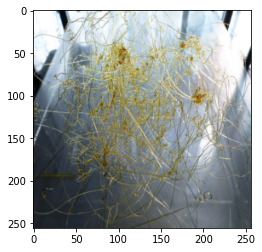

In [336]:
plt.imshow(dx_l[0])

In [337]:
dx_tn = dx[:270]
dx_tt = dx[270:]

In [338]:
dy_tn = dy[:270]
dy_tt = dy[270:]

In [339]:
print(dx_tn.shape, dx_tt.shape, dy_tn.shape, dy_tt.shape)

(270, 256, 256, 3) (28, 256, 256, 3) (270,) (28,)


In [340]:
dx_tn = dx_tn.reshape(270, 256, 256, 3)
dy_tn = pd.get_dummies(dy_tn)

dx_tt = dx_tt.reshape(28, 256, 256, 3)
dy_tt = pd.get_dummies(dy_tt)

In [341]:
print(dx_tn.shape, dx_tt.shape, dy_tn.shape, dy_tt.shape)

(270, 256, 256, 3) (28, 256, 256, 3) (270, 2) (28, 2)


In [359]:
X = tf.keras.layers.Input(shape=[256, 256, 3])

H = tf.keras.layers.Conv2D(20, kernel_size=5, padding='same', activation='selu')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(30, kernel_size=5, padding='same', activation='selu')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(300, activation='sigmoid')(H)
H = tf.keras.layers.Dense(200, activation='selu')(H)
H = tf.keras.layers.Dense(100, activation='elu')(H)
H = tf.keras.layers.Dense(50, activation='selu')(H)
H = tf.keras.layers.Dense(10, activation='tanh')(H)
Y = tf.keras.layers.Dense(2, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='mse', metrics='accuracy', optimizer='SGD')

In [360]:
model.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 256, 256, 20)      1520      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 128, 128, 20)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 128, 128, 30)      15030     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 64, 64, 30)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 122880)            0         
_________________________________________________________________
dense_121 (Dense)            (None, 300)               368

In [361]:
model.fit(dx_tn, dy_tn,validation_data=(dx_tt, dy_tt),epochs=10)

Epoch 1/10
9/9 [==============================] - 2s 141ms/step - loss: 0.2646 - accuracy: 0.6214 - val_loss: 0.1915 - val_accuracy: 0.7857
Epoch 2/10
9/9 [==============================] - 1s 125ms/step - loss: 0.1544 - accuracy: 0.8278 - val_loss: 0.1905 - val_accuracy: 0.7857
Epoch 3/10
9/9 [==============================] - 1s 122ms/step - loss: 0.1350 - accuracy: 0.8492 - val_loss: 0.1896 - val_accuracy: 0.7857
Epoch 4/10
9/9 [==============================] - 1s 122ms/step - loss: 0.1470 - accuracy: 0.8343 - val_loss: 0.1882 - val_accuracy: 0.7857
Epoch 5/10
9/9 [==============================] - 1s 122ms/step - loss: 0.1323 - accuracy: 0.8500 - val_loss: 0.1860 - val_accuracy: 0.7857
Epoch 6/10
9/9 [==============================] - 1s 122ms/step - loss: 0.1269 - accuracy: 0.8537 - val_loss: 0.1702 - val_accuracy: 0.7857
Epoch 7/10
9/9 [==============================] - 1s 124ms/step - loss: 0.1288 - accuracy: 0.8517 - val_loss: 0.1744 - val_accuracy: 0.7857
Epoch 8/10
9/9 [====

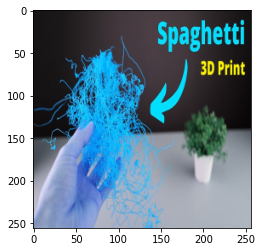

In [372]:
plt.imshow(dx_tt[0])

In [373]:
dy_tt[0:1]

,bad,good
0,1,0


In [374]:
check[model.predict(dx_tt[1:2]).argmax()]

'bad'

In [379]:
data = cv2.resize(cv2.imread('./data/test.jpg'), dsize=(256, 256), interpolation=cv2.INTER_AREA)

In [380]:
test = np.array([data])

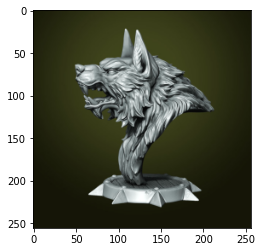

In [381]:
plt.imshow(test[0])

In [382]:
check[model.predict(test[0:1]).argmax()]

'bad'